# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from numba import njit
import numba
import math

# Defining variables

In [3]:
dx = 1.5e-10                    # Step length for each wave packet
Nt, dt = 5000000, 2.25e-19        # Amount of wave packets through time with change in time dt between each wave
m = 9.11e-31                    # Electron mass
h_bar = 1.054571817e-34
sigma = 1e-8                  
x_0 = 50e-9
E = 0.2*1.6e-19                 # Energy level wave packet
k = math.sqrt(2*m*E) / h_bar
L = 200e-9                      # Length of well
x_range = np.arange(0,L,dx)     # x-axis for wave packet

# Initial Wave packet and V(x) in well

0.9999999999991708

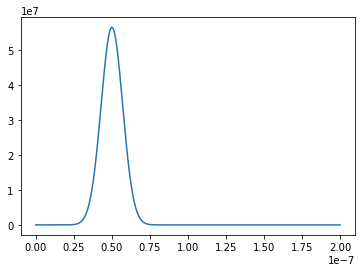

In [4]:
# To approximate the next wave at t+dt we need an initial wave pis0
psi0 = 1/(np.pi**0.25 * sigma**0.5) * np.exp(-0.5*(x_range-x_0)**2 / (sigma)**2) * np.exp(1j*k*(x_range-x_0))

psi0[0] = 0                                 # make sure the ned points have no wave in the well
psi0[-1] = 0
plt.plot(x_range,np.absolute(psi0)**2)      # plot
np.sum(np.absolute(psi0)**2)*dx             # check that wave is normalized

In [5]:
# Potential as a step function. In theory the script should work for any V(x)
V = []
for i in x_range:
    if i>=0.5*L:
        V.append(0.16*1.6e-19)
    else:
        V.append(0)

V = np.array(V)                 # numpy :)

# Compiling FDE to C++

In [6]:
@njit("c16[:](c16[:],c16[:])", nogil = True)      # I am speed. function returns c16[:] -> (complex numpy array), and has two c16[:] -> (complex numpy arrays) as input. Nogil to ensure compiling the right way
def new_wave_func(new_wave, old_wave):
    new_wave1 = new_wave
    for count in range(1,len(x_range)-1):         # note, function needs to have defined: x_range, h_bar, m 
        new_wave1[count] = (1j*h_bar/(2*m) * (old_wave[count+1] - 2*old_wave[count] + old_wave[count-1])*dt/(dx**2) - 1j*V[count]*old_wave[count]*dt/h_bar + old_wave[count])  # Finite difference method
    return new_wave1


# Main script

In [7]:
old_wave = psi0                                                     
new_wave = np.zeros(len(x_range), dtype=np.complex_)                # empty array
timer = 0                                                           # Keeping track of frames saved
divider = 1000                                                       # Amount of frames
saved_frames = np.zeros([divider, len(x_range)], dtype=np.complex_) # each saved_frames[x] is one wave
k = 0                                                               # to to index saved_frames

for i in range(0,Nt):
    timer += 1
    if timer == Nt/divider:                                         # saves waves everytime timer = Nt/divider
        saved_frames[k] = new_wave                         
        timer = 0
        k +=1
        print(f'progress: {k} av {divider}')                        # prints progress
    
    
    new_wave = np.zeros(len(x_range), dtype=np.complex_)            # empty wave to input function
    

    new_wave = new_wave_func(new_wave, old_wave)                    # numba function for new wave
    
    old_wave = new_wave                                             # saves new wave as old_wave for next iteration

progress: 1 av 1000
progress: 2 av 1000
progress: 3 av 1000
progress: 4 av 1000
progress: 5 av 1000
progress: 6 av 1000
progress: 7 av 1000
progress: 8 av 1000
progress: 9 av 1000
progress: 10 av 1000
progress: 11 av 1000
progress: 12 av 1000
progress: 13 av 1000
progress: 14 av 1000
progress: 15 av 1000
progress: 16 av 1000
progress: 17 av 1000
progress: 18 av 1000
progress: 19 av 1000
progress: 20 av 1000
progress: 21 av 1000
progress: 22 av 1000
progress: 23 av 1000
progress: 24 av 1000
progress: 25 av 1000
progress: 26 av 1000
progress: 27 av 1000
progress: 28 av 1000
progress: 29 av 1000
progress: 30 av 1000
progress: 31 av 1000
progress: 32 av 1000
progress: 33 av 1000
progress: 34 av 1000
progress: 35 av 1000
progress: 36 av 1000
progress: 37 av 1000
progress: 38 av 1000
progress: 39 av 1000
progress: 40 av 1000
progress: 41 av 1000
progress: 42 av 1000
progress: 43 av 1000
progress: 44 av 1000
progress: 45 av 1000
progress: 46 av 1000
progress: 47 av 1000
progress: 48 av 1000
p

progress: 379 av 1000
progress: 380 av 1000
progress: 381 av 1000
progress: 382 av 1000
progress: 383 av 1000
progress: 384 av 1000
progress: 385 av 1000
progress: 386 av 1000
progress: 387 av 1000
progress: 388 av 1000
progress: 389 av 1000
progress: 390 av 1000
progress: 391 av 1000
progress: 392 av 1000
progress: 393 av 1000
progress: 394 av 1000
progress: 395 av 1000
progress: 396 av 1000
progress: 397 av 1000
progress: 398 av 1000
progress: 399 av 1000
progress: 400 av 1000
progress: 401 av 1000
progress: 402 av 1000
progress: 403 av 1000
progress: 404 av 1000
progress: 405 av 1000
progress: 406 av 1000
progress: 407 av 1000
progress: 408 av 1000
progress: 409 av 1000
progress: 410 av 1000
progress: 411 av 1000
progress: 412 av 1000
progress: 413 av 1000
progress: 414 av 1000
progress: 415 av 1000
progress: 416 av 1000
progress: 417 av 1000
progress: 418 av 1000
progress: 419 av 1000
progress: 420 av 1000
progress: 421 av 1000
progress: 422 av 1000
progress: 423 av 1000
progress: 

progress: 753 av 1000
progress: 754 av 1000
progress: 755 av 1000
progress: 756 av 1000
progress: 757 av 1000
progress: 758 av 1000
progress: 759 av 1000
progress: 760 av 1000
progress: 761 av 1000
progress: 762 av 1000
progress: 763 av 1000
progress: 764 av 1000
progress: 765 av 1000
progress: 766 av 1000
progress: 767 av 1000
progress: 768 av 1000
progress: 769 av 1000
progress: 770 av 1000
progress: 771 av 1000
progress: 772 av 1000
progress: 773 av 1000
progress: 774 av 1000
progress: 775 av 1000
progress: 776 av 1000
progress: 777 av 1000
progress: 778 av 1000
progress: 779 av 1000
progress: 780 av 1000
progress: 781 av 1000
progress: 782 av 1000
progress: 783 av 1000
progress: 784 av 1000
progress: 785 av 1000
progress: 786 av 1000
progress: 787 av 1000
progress: 788 av 1000
progress: 789 av 1000
progress: 790 av 1000
progress: 791 av 1000
progress: 792 av 1000
progress: 793 av 1000
progress: 794 av 1000
progress: 795 av 1000
progress: 796 av 1000
progress: 797 av 1000
progress: 

# Transmission

Transmisjon = 0.845648983802342


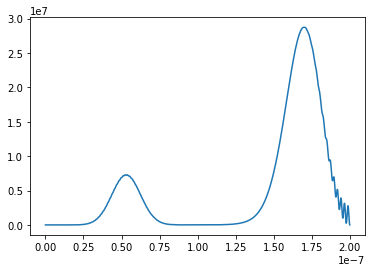

In [41]:
prob_wave = np.absolute(saved_frames)**2
plt.plot(x_range,prob_wave[700])

T = np.sum(np.absolute(prob_wave[700][650:]))*dx

print(f"Transmission = {T}")

# Animation

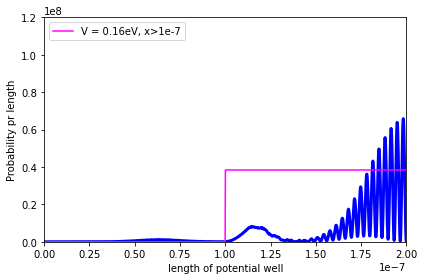

In [15]:
def animate(i):
    ln1.set_data(x_range, prob_wave[i])

fig, ax = plt.subplots()
ln1, = plt.plot([], [], 'b', lw=3, markersize=8)
plt.xlabel("length of potential well")
plt.ylabel("Probability pr length")


ax.set_xlim(0, 200e-9)
ax.set_ylim(0, 1.2e8)




plt.tight_layout()
plt.plot(x_range, V*1.5*10**27, c='magenta', label="V = 0.16eV, x>1e-7")
plt.legend(loc="upper left")
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=100000)

ani.save('probwave.gif',writer='pillow',fps=50,dpi=100)